# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import sys
sys.path.append('..\..\..\..\config_files')

from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
qurl = f'{url}appid={api_key}&q={cities[3]}'
response = requests.get(qurl).json()

data = []

print(cities[3])
response



amderma


{'cod': '404', 'message': 'city not found'}

In [4]:
counter = 1

for city in cities:
    qurl = f'{url}appid={api_key}&q={city}'
    response = requests.get(qurl).json()
    
    if response['cod']==200:
        print(f'Processing record {counter}: {city}')
        counter += 1
        info = {
            'City':response['name'],
            'Lat':response['coord']['lat'],
            'Lng':response['coord']['lon'],
            'Max Temp':response['main']['temp'],
            'Clouds':response['clouds']['all'],
            'Wind Speed':response['wind']['speed'],
            'Humidity':response['main']['humidity']
        }
        data.append(info)
        
    else:
        print("City not found")
weather_df = pd.DataFrame(data)

Processing record 1: tasiilaq
Processing record 2: ushuaia
Processing record 3: jipijapa
City not found
Processing record 4: pacific grove
Processing record 5: nishihara
Processing record 6: sao miguel do araguaia
Processing record 7: luzhou
Processing record 8: cedar city
Processing record 9: lebu
Processing record 10: albany
Processing record 11: buala
Processing record 12: vaini
Processing record 13: srednekolymsk
Processing record 14: mataura
Processing record 15: alofi
Processing record 16: batagay
Processing record 17: rikitea
Processing record 18: sao filipe
Processing record 19: avera
Processing record 20: severodvinsk
Processing record 21: codrington
Processing record 22: punta arenas
Processing record 23: tiksi
Processing record 24: victoria
Processing record 25: flinders
Processing record 26: dikson
Processing record 27: yellowknife
Processing record 28: the valley
Processing record 29: lata
Processing record 30: baracoa
Processing record 31: hermanus
Processing record 32: m

Processing record 247: hasaki
City not found
Processing record 248: tommot
City not found
Processing record 249: rorvik
Processing record 250: cap malheureux
Processing record 251: cabedelo
Processing record 252: kangaatsiaq
Processing record 253: whitianga
Processing record 254: dachau
City not found
Processing record 255: sayyan
City not found
Processing record 256: shimoda
Processing record 257: kavaratti
Processing record 258: dondo
Processing record 259: henties bay
Processing record 260: bone
Processing record 261: barabai
Processing record 262: narovchat
Processing record 263: iskilip
Processing record 264: cabra
Processing record 265: pucallpa
Processing record 266: yingcheng
Processing record 267: quatre cocos
Processing record 268: soe
Processing record 269: praia da vitoria
Processing record 270: ust-nera
Processing record 271: marystown
Processing record 272: egvekinot
Processing record 273: havoysund
Processing record 274: jian
Processing record 275: orchard homes
Processi

Processing record 490: kigoma
Processing record 491: revelstoke
Processing record 492: lithgow
City not found
Processing record 493: richards bay
Processing record 494: camacupa
Processing record 495: kjopsvik
Processing record 496: novikovo
Processing record 497: marsh harbour
City not found
Processing record 498: fairbanks
Processing record 499: kodinsk
City not found
Processing record 500: itarema
Processing record 501: sisophon
Processing record 502: pucara
City not found
Processing record 503: gebre guracha
Processing record 504: santa marta
Processing record 505: ullapool
Processing record 506: hofn
Processing record 507: victor harbor
Processing record 508: grand rapids
Processing record 509: kabin buri
Processing record 510: alta floresta
City not found
Processing record 511: karratha
Processing record 512: ancud
Processing record 513: laguna
Processing record 514: salas
Processing record 515: luderitz
Processing record 516: blackwater
Processing record 517: bazarnyye mataki
Pr

In [5]:
weather_df.head()

,City,Clouds,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,100,73,65.61,-37.64,270.15,4.6
1,Ushuaia,90,98,-54.81,-68.31,274.15,10.8
2,Jipijapa,20,69,-1.35,-80.58,298.15,5.7
3,Pacific Grove,1,72,36.62,-121.92,291.39,5.1
4,Nishihara,40,67,35.74,139.53,286.65,0.5


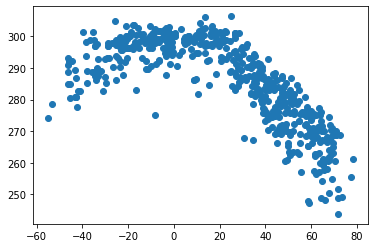

In [7]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])

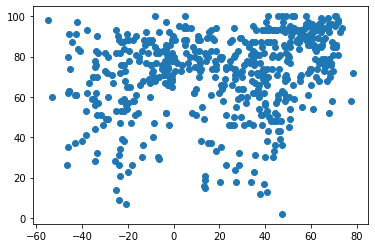

In [8]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'])

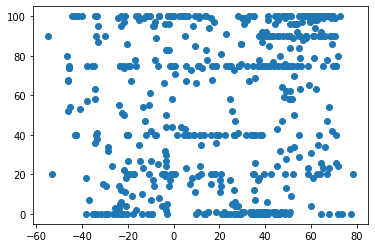

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Clouds'])

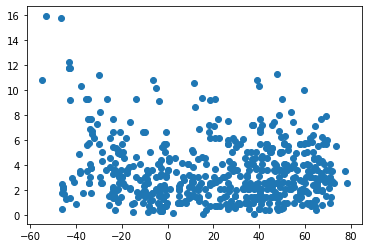

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

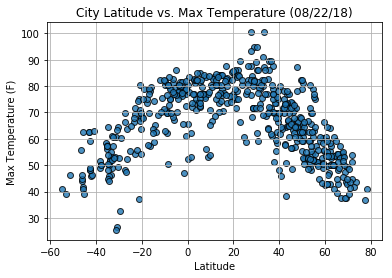

#### Latitude vs. Humidity Plot

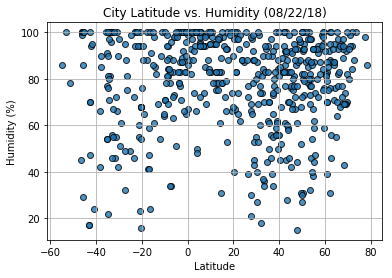

#### Latitude vs. Cloudiness Plot

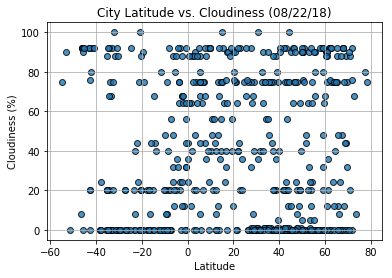

#### Latitude vs. Wind Speed Plot

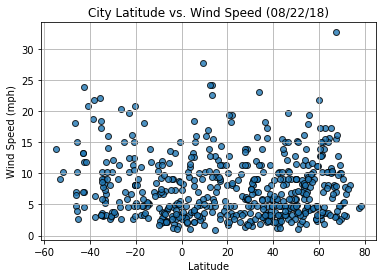